In [1]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "/Users/noahjacobs/Triplab/Notebook/csv"

# Initialize the cache and dget the metadata for cells, download if neccessary (to current directory)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
cells = ctc.get_cells()

# Get the ephys features of all cells, download if neccessary
ephys_features = ctc.get_ephys_features()

ef_df = pd.DataFrame(ephys_features)

# List of all ephys feature names
ephys_features = list(ef_df)



In [2]:
cell_index = {c['id']: c for c in cells}

# Label species, human (Homo Sapiens) or mouse (Mus musculus)
cell_types = [cell_index[cid]['species'] for cid in ef_df['specimen_id']]

ef_df['species'] = pd.Series(cell_types, index=ef_df.index)


# Label cre line
cell_index = {c['id']: c for c in cells}
cre_line = [cell_index[cid]['transgenic_line'] for cid in
                  ef_df['specimen_id']]

ef_df['cre_line'] = pd.Series(cre_line, index=ef_df.index)

# Set label cre line of human cells to 'Human'
for index, row in ef_df.iterrows():
    if "Homo Sapiens" in set(row):
        ef_df.set_value(index, 'cre_line', 'Human')

# Label dendrite type, spiny, aspiny, or sparsely spiny
dendrite_type = [cell_index[cid]['dendrite_type'] for cid in
                  ef_df['specimen_id']]

ef_df['dendrite_type'] = pd.Series(dendrite_type, index=ef_df.index)

#Drop cells without reporter_status = positive
dropped_cells = []
for x in cell_index:
    if cell_index[x]['species'] == 'Mus musculus':
        #print(cell_index[x]['reporter_status'])
        if cell_index[x]['reporter_status'] != 'positive':
            #dropped_cells++
            dropped_cells.append(x)
            
            
for x in dropped_cells:
    cell_index.pop(x)
print('{} cells dropped.'.format(len(dropped_cells)))




/Users/noahjacobs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


105 cells dropped.


In [3]:
# Create a list of features that are to be dropped. Example: specimen id and data containing NaN
dropped_features = ['id', 'rheobase_sweep_id', 'rheobase_sweep_number',
                    'thumbnail_sweep_id', 'seal_gohm','vm_for_sag']
print()
# Find features with missing data
for index, column in ef_df.iteritems():
    na_array = pd.isna(column)
    for values in na_array:
        if values == True:
              if column.name not in dropped_features:
                    dropped_features.append(column.name)


dropped_features.sort()

# Drop the list of ephys features used for PCA.
for dropped_item in dropped_features:
    ephys_features.remove(dropped_item)
ephys_features.remove('specimen_id')

print('{} features dropped.'.format(len(dropped_features)))
print('{} features in dataframe.'.format(len(ephys_features)))

# Drop the features in the main dataframe.
ef_df.drop(columns=dropped_features, axis = 1, inplace = True)

print(dropped_features)
print(ephys_features)


25 features dropped.
30 features in dataframe.
['adaptation', 'avg_isi', 'electrode_0_pa', 'fast_trough_t_ramp', 'fast_trough_v_ramp', 'id', 'peak_t_ramp', 'peak_v_ramp', 'rheobase_sweep_id', 'rheobase_sweep_number', 'seal_gohm', 'slow_trough_t_long_square', 'slow_trough_t_ramp', 'slow_trough_t_short_square', 'slow_trough_v_long_square', 'slow_trough_v_ramp', 'slow_trough_v_short_square', 'threshold_i_ramp', 'threshold_t_ramp', 'threshold_v_ramp', 'thumbnail_sweep_id', 'trough_t_ramp', 'trough_v_ramp', 'upstroke_downstroke_ratio_ramp', 'vm_for_sag']
['f_i_curve_slope', 'fast_trough_t_long_square', 'fast_trough_t_short_square', 'fast_trough_v_long_square', 'fast_trough_v_short_square', 'has_burst', 'has_delay', 'has_pause', 'input_resistance_mohm', 'latency', 'peak_t_long_square', 'peak_t_short_square', 'peak_v_long_square', 'peak_v_short_square', 'ri', 'sag', 'tau', 'threshold_i_long_square', 'threshold_i_short_square', 'threshold_t_long_square', 'threshold_t_short_square', 'threshold

In [4]:
# Mouse dataframe
mouse_ef_df = ef_df[ef_df['species']=='Mus musculus']
# Human dataframe
human_ef_df = ef_df[ef_df['species']=='Homo Sapiens']

print('Total number of human cells with electrophysiology features: {}'.format(len(human_ef_df)))
print('Number of human spiny cells: {}'.format(len(human_ef_df[human_ef_df['dendrite_type']=='spiny'])))
print('Number of human aspiny cells: {}'.format(len(human_ef_df[human_ef_df['dendrite_type']=='aspiny'])))
print('Number of human sparsely spiny cells: {}\n'.format(len(human_ef_df[human_ef_df['dendrite_type']=='sparsely spiny'])))

print('Total number of mouse cells with electrophysiology features: {}'.format(len(mouse_ef_df)))
print('Number of mouse spiny cells: {}'.format(len(mouse_ef_df[mouse_ef_df['dendrite_type']=='spiny'])))
print('Number of mouse aspiny cells: {}'.format(len(mouse_ef_df[mouse_ef_df['dendrite_type']=='aspiny'])))
print('Number of mouse sparsely spiny cells: {}'.format(len(mouse_ef_df[mouse_ef_df['dendrite_type']=='sparsely spiny'])))

Total number of human cells with electrophysiology features: 413
Number of human spiny cells: 321
Number of human aspiny cells: 79
Number of human sparsely spiny cells: 13

Total number of mouse cells with electrophysiology features: 1920
Number of mouse spiny cells: 892
Number of mouse aspiny cells: 921
Number of mouse sparsely spiny cells: 107


Skipping has_burst
Skipping has_delay
Skipping has_pause
Skipping specimen_id


/Users/noahjacobs/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Skipping species
Skipping cre_line
Skipping dendrite_type


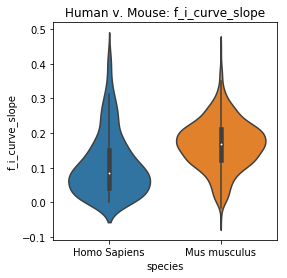

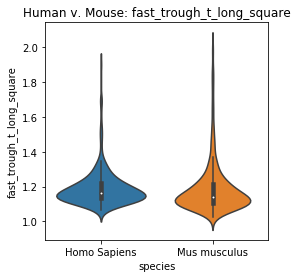

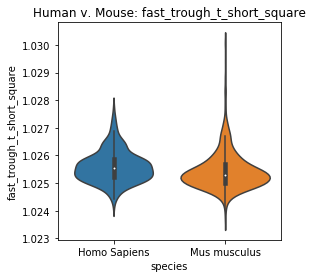

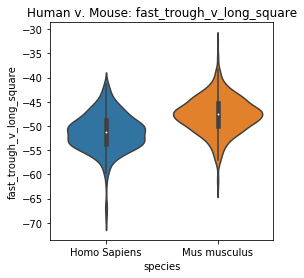

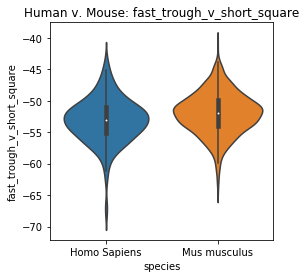

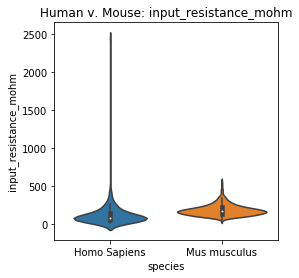

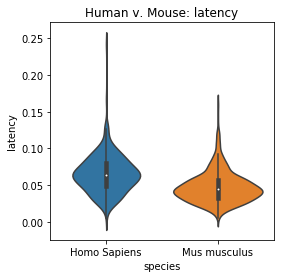

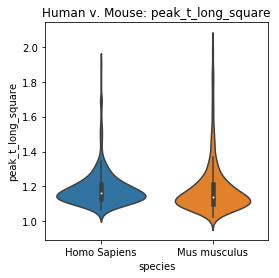

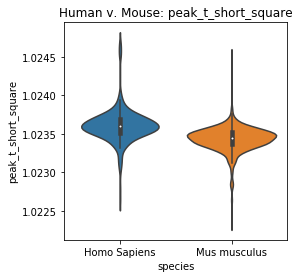

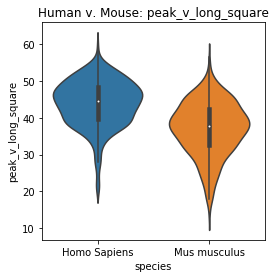

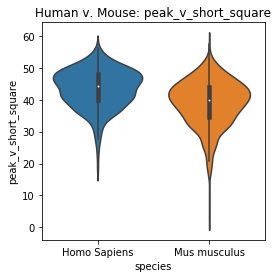

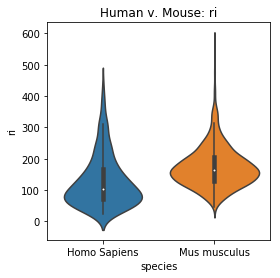

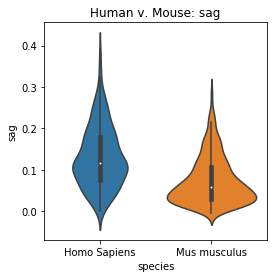

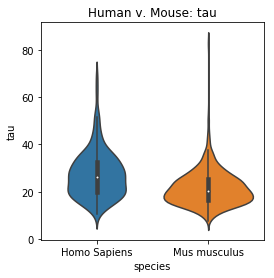

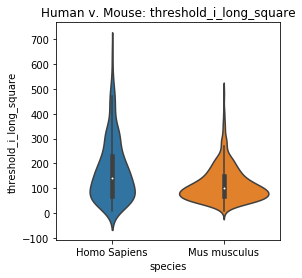

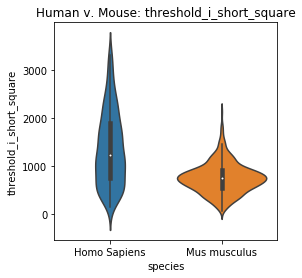

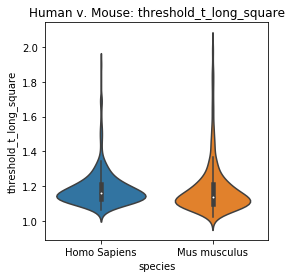

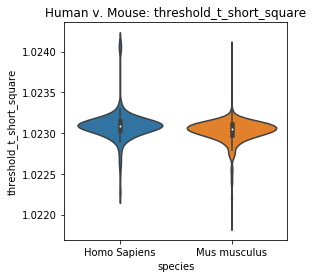

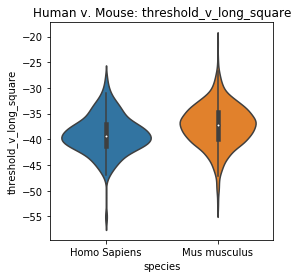

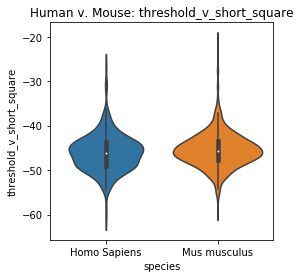

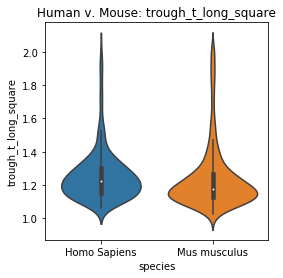

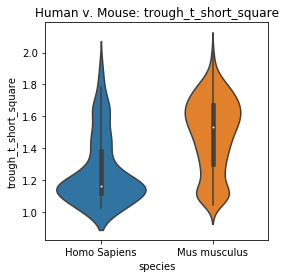

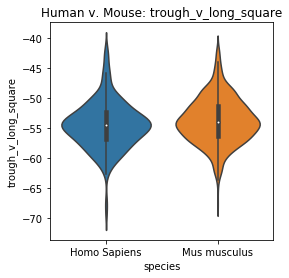

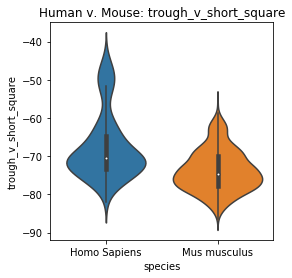

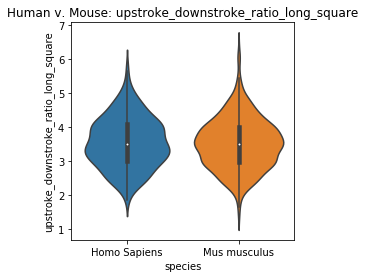

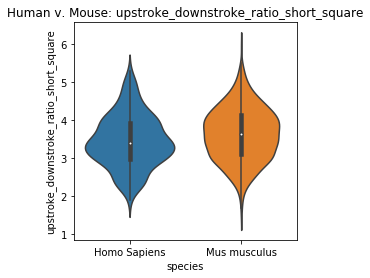

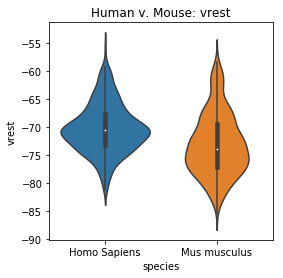

In [5]:
non_numeric = ['has_burst','has_delay','has_pause','species','cre_line','dendrite_type','specimen_id']
for z in ef_df:
    if z in non_numeric:
        print('Skipping ' + z)
    else:
        plt.figure(figsize=(4, 4))
        plt.title('Human v. Mouse: ' + z)
        sns.violinplot(x = "species", y = z, data =ef_df[ef_df.dendrite_type == 'spiny'])
    

In [6]:
from string import ascii_letters
histogram_intersection = lambda a, b: np.minimum(a, b).sum().round(decimals=1)
cors = ef_df.corr(method = 'spearman')

cors = cors.drop("has_burst", axis = 1)
cors = cors.drop("has_burst")
cors = cors.drop("has_delay", axis = 1)
cors = cors.drop("has_delay")
cors = cors.drop("has_pause", axis = 1)
cors = cors.drop("has_pause")

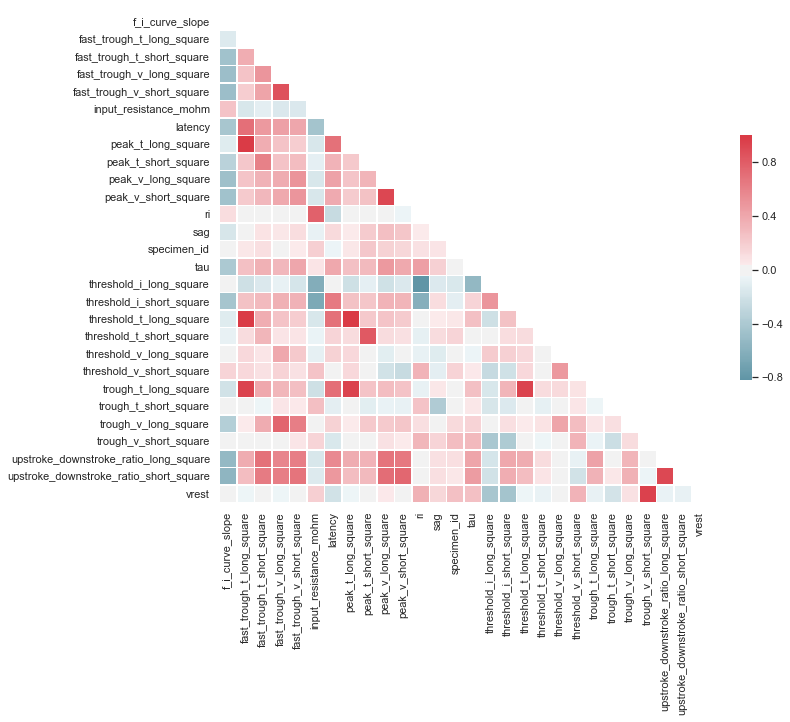

In [7]:
sns.set(style="white")

mask = np.zeros_like(cors, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(cors, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

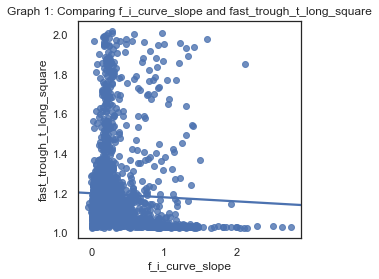

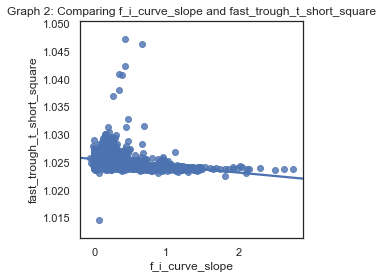

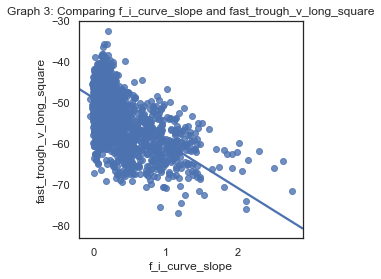

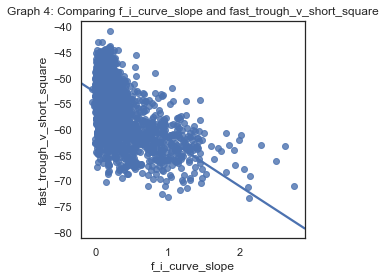

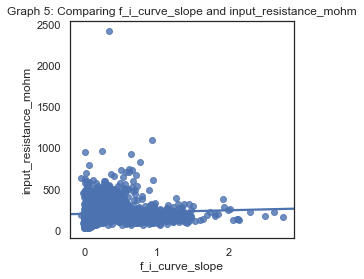

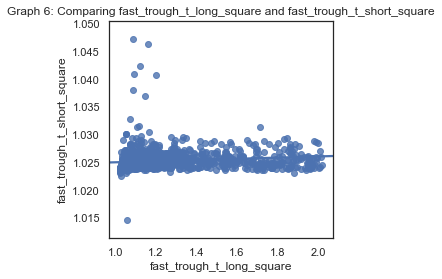

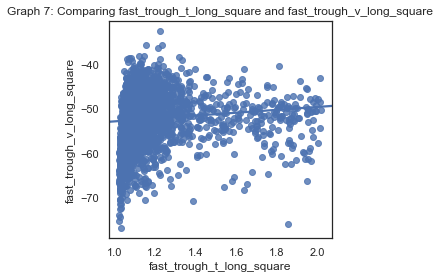

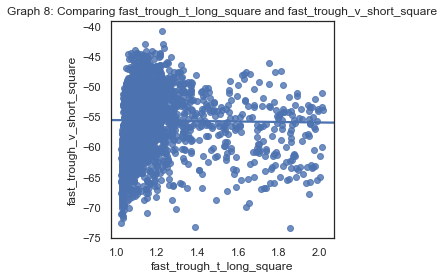

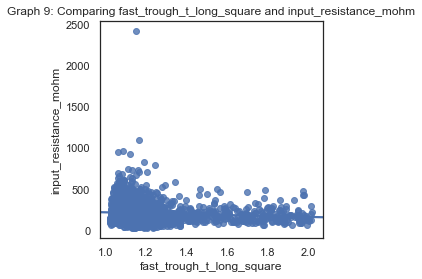

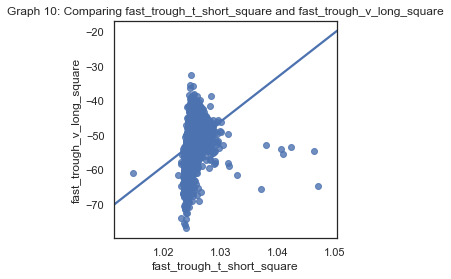

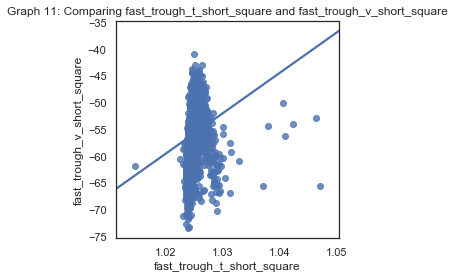

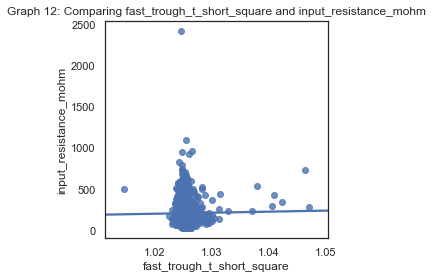

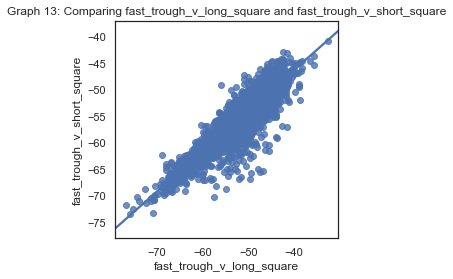

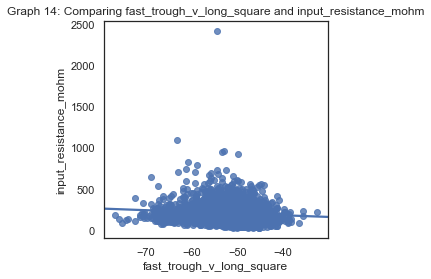

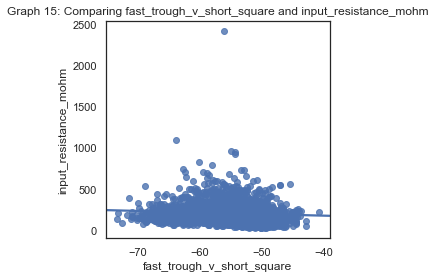

In [8]:

plt_feat2 = ['f_i_curve_slope', 'fast_trough_t_long_square', 'fast_trough_t_short_square', 
             'fast_trough_v_long_square','fast_trough_v_short_square', 'input_resistance_mohm']
done = []
counter = 0

for i in plt_feat2:
    for j in plt_feat2:
        if i != j and j not in done:
            counter = counter + 1
            plt.figure(figsize=(4, 4))
            plt.title('Graph ' + str(counter) + ': Comparing ' + i + ' and ' + j)
            sns.regplot(x = i, y = j, data = ef_df, ci=None)
    done.append(i)